In [1]:
# ! pip install zarr

In [2]:
import allel
import zarr
import numpy as np
import matplotlib.pyplot as plt

def load_callset(callset_file, overwrite=True, **kwargs):
    if overwrite:
        allel.vcf_to_zarr(callset_file, f'{callset_file}.zarr', overwrite=True, **kwargs)
    callset = zarr.open_group(f'{callset_file}.zarr', mode='r')
    return callset

def get_gt_vsp(callset):
    return allel.GenotypeDaskArray(callset['calldata/GT'])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
integrated_sv_vcf_gz = '/home/jupyter/AoU1-v1/integrated-callset/cal_sens_07/concat.vcf.preprocess.gz'
hiphase_sv_vcf_gz = '/home/jupyter/AoU1-v1/hiphase-outputs/chr1_finalsv_scaffold.vcf.gz'

In [4]:
integrated_sv_raw_vcf_gz = '/home/jupyter/AoU1-v1/integrated-callset/cal_sens_07/concat.vcf.gz'

# ! bcftools norm -r chr1 -m+ {integrated_sv_raw_vcf_gz} -Ou | \
#     bcftools plugin fill-tags -Oz -o {integrated_sv_vcf_gz} -- -t AF,AC,AN
# ! bcftools plugin fill-tags {integrated_sv_raw_vcf_gz} -Oz -o {integrated_sv_vcf_gz} -- -t AF,AC,AN
# ! bcftools index -t {integrated_sv_vcf_gz}

In [70]:
! bcftools view -r chr1:728687-728868 {integrated_sv_raw_vcf_gz} -Oz -o /tmp/test.vcf.gz
! bcftools index -t /tmp/test.vcf.gz 
! samtools faidx /home/jupyter/AoU1-v1/resources/chm13v2.0.ebv.fa chr1:728687-728868 | \
    bcftools consensus /tmp/test.vcf.gz -s 1000151
    
! bcftools norm -r chr1:728687-728868 --atomize -m+any {integrated_sv_raw_vcf_gz} -Oz -o /tmp/test.vcf.gz
! bcftools index -t /tmp/test.vcf.gz
! samtools faidx /home/jupyter/AoU1-v1/resources/chm13v2.0.ebv.fa chr1:728687-728868 | \
    bcftools consensus /tmp/test.vcf.gz -s 1000151    
    # bcftools norm --atomize -m+any | bcftools view -H 
    # bcftools plugin setGT -- -t . -n 0 | bcftools norm --atomize -m+any | bcftools view -H 
    
! bcftools plugin setGT -r chr1:728687-728868 {integrated_sv_raw_vcf_gz} -- -t . -n 0 | \
    bcftools plugin fill-tags -- -t AN,AC,AF | \
    bcftools norm --atomize -m+any -Oz -o /tmp/test.vcf.gz
! bcftools index -t /tmp/test.vcf.gz
! samtools faidx /home/jupyter/AoU1-v1/resources/chm13v2.0.ebv.fa chr1:728687-728868 | \
    bcftools consensus /tmp/test.vcf.gz -s 1000151 

>chr1:728687-728868
The site chr1:728687 overlaps with another variant, skipping...
AgtggcacgtgtgtgtgtgcacaggcgCGGGGCAGGGGCCATCCCCGg
Applied 1 variants
Lines   total/split/realigned/skipped:	8/0/0/0
>chr1:728687-728868
AGTGGCACGTGTGTGTGTGCACAGGCGCGGGGCAGGGGCCATCCCCGGTGGCACGTGTGT
GTGTGCACGGGCTTGGGGCAGGGGCCATCCCCG
Applied 1 variants
Filled 16464 alleles
Lines   total/split/realigned/skipped:	8/0/0/0
>chr1:728687-728868
The site chr1:728713 overlaps with another variant, skipping...
The site chr1:728733 overlaps with another variant, skipping...
The site chr1:728739 overlaps with another variant, skipping...
The site chr1:728802 overlaps with another variant, skipping...
AGTGGCACGTGTGTGTGTGCACAGGCGCGGGGCAGGGGCCATCCCCGGTGGCACGTGTGT
GTGTGCACGGGCTTGGGGCAGGGGCCATCCCCG
Applied 1 variants


In [ ]:
! bcftools view -H /tmp/test.vcf.gz -s 1000151 

In [71]:
! bcftools view -H /tmp/test.vcf.gz -s 1000151 

chr1	728641	pbsv.DEL.97;pbsv.DEL.92;chr1-728642-DEL-272;pbsv.DEL.112;pbsv.DEL.95;chr1-728642-DEL-272;pbsv.DEL.103;chr1-728642-DEL-272;pbsv.DEL.117;chr1-728642-DEL-272	AGTGGCACGTAGGTGTGTGCACCGGCACGGGGCAGGGGCCATCCCCAGTGGCACGTGTGTGTGTGCACAGGCGCGGGGCAGGGGCCATCCCCAGTGGCACGTGTGTGTGTGCACAGGCGCGGGGCAGGGGCCATCCCCGGTGGCACATGTGTGCACGGGCTTGGGGCAGGGGCCATCCCCGGTGGCACGTGTGTGTGTGCACAGGCGCGGGGCAGGGGCCATCCCCGGTGGCACGTGTGTGTGTGCACGGGCTTGGGGCAGGGGCCATCCCCG	A	1	PASS	CALIBRATION_SENSITIVITY=0.5786;CollapseId=421.9;DR=4;DV=4;GQ=28;NumCollapsed=1;NumConsolidated=3;SCORE=0.7868;SUPP_PAV=0;SUPP_PBSV=1;SUPP_SNIFFLES=1;SVLEN=272;SVTYPE=DEL;calibration;extracted;training;HOM_REF=0,9;HOM_TIG=0,9;ID=chr1-728642-DEL-272;QUERY_STRAND=-;TIG_REGION=h1tg018525l:815-815;AC=0;AN=2;AF=0.00605214	GT:GQ:DR:DV:SCORE:CALIBRATION_SENSITIVITY:SUPP_PBSV:SUPP_SNIFFLES:SUPP_PAV	0/0:.:.:.:.:.:.:.:.
chr1	728687	chr1-728688-DEL-134;pbsv.DEL.110;pbsv.DEL.106;pbsv.DEL.101;pbsv.DEL.124;pbsv.DEL.103;pbsv.DEL.112;pbsv.DEL.99;pbsv.DEL.116;pb

In [29]:
! bcftools norm -a -m + -r chr1:2100-2200 {integrated_sv_vcf_gz} | bcftools view -H | head -10

Lines   total/split/realigned/skipped:	4/0/0/0
chr1	2142	chr1-2143-DEL-114	CCCTAACCCTAACCCTTAACCCTAACCCTAACCCTAACCCGACCCTGACCCTGACCCTGACCCTGACCCTGGACCCTGACCCTGACCCTGACCCTGACCCTGACCCTGACCCTGA	C	1	PASS	CALIBRATION_SENSITIVITY=0.6925;CollapseId=1.0;DR=2;DV=2;GQ=14;HOM_REF=0,2;HOM_TIG=0,2;ID=chr1-2143-DEL-114;NumCollapsed=1;NumConsolidated=1;QUERY_STRAND=-;SCORE=0.7142;SUPP_PAV=1;SUPP_PBSV=0;SUPP_SNIFFLES=1;SVLEN=114;SVTYPE=DEL;TIG_REGION=h2tg019167l:32998-32998;AC=1;AN=2;AF=0.5	GT:GQ:DR:DV:SCORE:CALIBRATION_SENSITIVITY:SUPP_PBSV:SUPP_SNIFFLES:SUPP_PAV	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.

In [31]:
! bcftools norm -m +any -r chr1:728687 {integrated_sv_raw_vcf_gz} -s 1000151

##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##ALT=<ID=BND,Description="Breakend; Translocation">
##ALT=<ID=CNV,Description="Copy number variable region">
##ALT=<ID=DEL,Description="Deletion">
##ALT=<ID=DUP,Description="Duplication">
##ALT=<ID=INS,Description="Insertion">
##ALT=<ID=INV,Description="Inversion">
##FILTER=<ID=COV_CHANGE,Description="Coverage change filter">
##FILTER=<ID=COV_MIN,Description="Minimum coverage filter">
##FILTER=<ID=Decoy,Description="Variant involves a decoy sequence">
##FILTER=<ID=GT,Description="Genotype filter">
##FILTER=<ID=InsufficientStrandEvidence,Description="Variant has insufficient number of reads per strand (< 0).">
##FILTER=<ID=LOW_SCORE,Description="Low score (corresponding to high calibration sensitivity)">
##FILTER=<ID=NM,Description="Alignment noise level filter">
##FILTER=<ID=NearContigEnd,Description="Variant is near (< 1000 bp) from the end of a contig">
##FILTER=<ID=NearReferenceGap,Description="Variant is near

chr1	728641	pbsv.DEL.97;pbsv.DEL.92;chr1-728642-DEL-272;pbsv.DEL.112;pbsv.DEL.95;chr1-728642-DEL-272;pbsv.DEL.103;chr1-728642-DEL-272;pbsv.DEL.117;chr1-728642-DEL-272	AGTGGCACGTAGGTGTGTGCACCGGCACGGGGCAGGGGCCATCCCCAGTGGCACGTGTGTGTGTGCACAGGCGCGGGGCAGGGGCCATCCCCAGTGGCACGTGTGTGTGTGCACAGGCGCGGGGCAGGGGCCATCCCCGGTGGCACATGTGTGCACGGGCTTGGGGCAGGGGCCATCCCCGGTGGCACGTGTGTGTGTGCACAGGCGCGGGGCAGGGGCCATCCCCGGTGGCACGTGTGTGTGTGCACGGGCTTGGGGCAGGGGCCATCCCCG	A	1	PASS	CALIBRATION_SENSITIVITY=0.5786;CollapseId=421.9;DR=4;DV=4;GQ=28;NumCollapsed=1;NumConsolidated=3;SCORE=0.7868;SUPP_PAV=0;SUPP_PBSV=1;SUPP_SNIFFLES=1;SVLEN=272;SVTYPE=DEL;calibration;extracted;training;HOM_REF=0,9;HOM_TIG=0,9;ID=chr1-728642-DEL-272;QUERY_STRAND=-;TIG_REGION=h1tg018525l:815-815;AC=13;AN=18	GT:GQ:DR:DV:SCORE:CALIBRATION_SENSITIVITY:SUPP_PBSV:SUPP_SNIFFLES:SUPP_PAV	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.:.:.:.:.:.	./.:.:.:.

In [161]:
! samtools faidx /home/jupyter/AoU1-v1/resources/chm13v2.0.ebv.fa chr1 | bcftools consensus {integrated_sv_raw_vcf_gz} -s 1000151 > /dev/null

The site chr1:728687 overlaps with another variant, skipping...
The site chr1:2142599 overlaps with another variant, skipping...
The site chr1:2461383 overlaps with another variant, skipping...
The site chr1:2803792 overlaps with another variant, skipping...
The site chr1:3080058 overlaps with another variant, skipping...
The site chr1:5530979 overlaps with another variant, skipping...
The site chr1:7854521 overlaps with another variant, skipping...
The site chr1:8035210 overlaps with another variant, skipping...
The site chr1:8611628 overlaps with another variant, skipping...
The site chr1:10287937 overlaps with another variant, skipping...
The site chr1:11008158 overlaps with another variant, skipping...
The site chr1:22484287 overlaps with another variant, skipping...
The site chr1:24838261 overlaps with another variant, skipping...
The site chr1:35122938 overlaps with another variant, skipping...
The site chr1:43970876 overlaps with another variant, skipping...
The site chr1:480717

In [ ]:
callset = load_callset(callset_vcf_gz, overwrite=overwrite, fields=['calldata/GT', 'altlen', 'samples', 'AF', 'CHROM'], **kwargs)

In [121]:
def get_hist_data(callset_vcf_gz, overwrite=True, **kwargs):
    print(f'Loading {callset_vcf_gz}...')
    callset = load_callset(callset_vcf_gz, overwrite=overwrite, fields=['calldata/GT', 'altlen', 'samples', 'AF', 'CHROM'], **kwargs)
    altlen = np.squeeze(callset['variants/altlen'][:])
    gt_vsp = get_gt_vsp(callset)
    num_alt_alleles_v = np.sum(gt_vsp.is_het() * 1 + gt_vsp.is_hom_alt() * 2, axis=1).compute()
    af_v = np.squeeze(callset['variants/AF'][:])

    return altlen, num_alt_alleles_v, gt_vsp, af_v

In [122]:
def plot_hist_data(label, altlen, num_alt_alleles_v, show=False):
    print(f'Plotting {label}...')
    bins = list(np.linspace(-10000, -100, 397)) + [-75, -50, -25, -1, -0.1, 0.1, 1, 25, 50, 75] + list(np.linspace(100, 10000, 397))
    plt.hist(altlen, bins=bins, label=label, log=True, histtype='step', alpha=0.5)#,
             #weights=num_alt_alleles_v)
    plt.xscale('symlog', linthresh=100)
    plt.xticks([-1E4, -1E3] + list(np.linspace(-100, 100, 9)) + [1E3, 1E4],
               labels=['$-10^4$', '$-10^3$', '$-10^2$'] + ['', '$-50$', '', '$0$', '', '$50$', ''] + ['$10^2$', '$10^3$', '$10^4$'])
    plt.ylabel('Number of ALT alleles')
    plt.xlabel('ALT length - REF length (bp)')
    
    if show:
        plt.legend()
        plt.show()

In [123]:
integrated_hist_data = get_hist_data(integrated_sv_vcf_gz, overwrite=True, region='chr1')
hiphase_hist_data = get_hist_data(hiphase_sv_vcf_gz, overwrite=True)

Loading /home/jupyter/AoU1-v1/integrated-callset/cal_sens_07/concat.vcf.fill.gz...
Loading /home/jupyter/AoU1-v1/hiphase-outputs/chr1_finalsv_scaffold.vcf.gz...


Plotting integrated...
Plotting HiPhase...


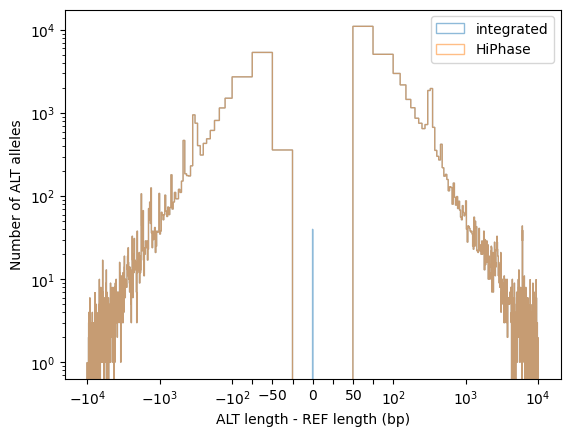

In [112]:
plot_hist_data('integrated', *integrated_hist_data[:2])
plot_hist_data('HiPhase', *hiphase_hist_data[:2], show=True)

In [124]:
import matplotlib.colors

ternary_to_cartesian = lambda a, b, c: (0.5 * (2 * b + c) / (a + b + c + 1E-10), 0.5 * np.sqrt(3) * c / (a + b + c + 1E-10))

def calc_hwe_ternary(x, m=1, f=1):
    return np.array([1 - f, 0, 0]) + f * np.array([m * (1 - x)**2 + (1 - m) * (1 - x),   # hom ref
                                                   m * x**2 + (1 - m) * x,               # hom alt
                                                   2 * m * x * (1 - x)])                 # het

def make_de_finetti_ax(ax=None):
    if ax is None:
        ax = plt.axes(xlim=[-0.1, 1.1], ylim=[-0.1, np.sqrt(3) / 2 + 0.1])
    ax.set_aspect(np.sqrt(3) / 2)
    ax.axis('off')
    ep = 0.02
    ax.plot([-2 * ep / np.sqrt(3), 1 + 2 * ep / np.sqrt(3)], [-ep, -ep], lw=3, c='k')
    ax.plot([-2 * ep / np.sqrt(3), 0.5], [-ep, 0.5 * np.sqrt(3) + ep], lw=3, c='k')
    ax.plot([1 + 2 * ep / np.sqrt(3), 0.5], [-ep, 0.5 * np.sqrt(3) + ep], lw=3, c='k')
    ax.text(-4 * ep / np.sqrt(3), -4 * ep, 'HOM\nREF ', fontsize=16, ha='right')
    ax.text(0.5, 0.5 * np.sqrt(3) + 3 * ep, 'HET', fontsize=16, ha='center')
    ax.text(1 + 4 * ep / np.sqrt(3), -4 * ep, 'HOM\n ALT', fontsize=16, ha='left')
    return ax

def plot_de_finetti(ax, gt_vsp, title='', show=False, gridsize=70):
    def plot_curve(ax, c='C1', ls='solid', lw=1):
        x_values = np.linspace(0, 1, 50)
        cart_values = np.array([ternary_to_cartesian(*calc_hwe_ternary(x)) for x in x_values])
        ax.plot(cart_values[:, 0], cart_values[:, 1], c=c, ls=ls, lw=lw)
        
    num_hom_ref_v = gt_vsp.is_hom_ref().sum(axis=1)
    num_het_v = gt_vsp.is_het().sum(axis=1)
    num_hom_var_v = gt_vsp.is_hom_alt().sum(axis=1)
    x_ternary_v, y_ternary_v = ternary_to_cartesian(num_hom_ref_v, num_hom_var_v, num_het_v)
    
#     ax.scatter(x_ternary_v, y_ternary_v, s=1, alpha=0.5)
    plt.hexbin(x_ternary_v, y_ternary_v, gridsize=gridsize, extent=[0, 1, 0, np.sqrt(3) / 2], norm=matplotlib.colors.LogNorm())
    cbar = plt.colorbar(ax=ax, shrink=0.5)
    cbar.set_label('Number of variants', rotation=270, labelpad=10)
    plot_curve(ax, lw=3)
    
    ax.text(0.5, -0.3, title, fontsize=24, ha='center')
    if show:
        plt.show()
    return ax

In [146]:
integrated_hist_data[2]

<GenotypeDaskArray shape=(60271, 1074, 2) dtype=int8>

In [147]:
hiphase_hist_data[2]

<GenotypeDaskArray shape=(60231, 1074, 2) dtype=int8>

/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6764: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


(array([[1.5260e+03, 2.0000e+00, 5.0000e+00, 2.0000e+00, 5.0000e+00,
         9.0000e+00, 1.4000e+01, 5.0000e+00, 3.0000e+01, 4.0000e+00,
         9.0000e+00, 3.0000e+00, 2.9100e+02, 3.0000e+00, 1.5000e+01,
         3.2000e+01, 1.7000e+02, 2.6000e+01, 1.4500e+02, 3.3000e+01,
         1.7400e+02, 9.6000e+01, 1.3000e+02, 1.3100e+02, 8.2000e+01,
         2.7047e+04, 9.3200e+02, 1.3980e+03, 1.7290e+03, 1.4510e+03,
         1.6770e+03, 1.6730e+03, 9.1500e+02, 1.9710e+03, 6.0500e+02,
         9.4100e+02, 5.2600e+02, 2.9650e+03, 3.3100e+02, 3.2900e+02,
         5.0900e+02, 8.6500e+02, 2.6100e+02, 4.5300e+02, 1.8200e+02,
         3.4400e+02, 1.7600e+02, 1.3800e+02, 7.8000e+01, 9.3830e+03],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 

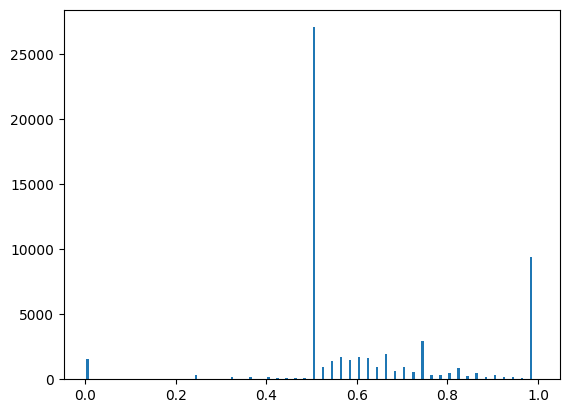

In [125]:
plt.hist(integrated_hist_data[3], bins=50)

(array([[41354.,  1888.,   902.,   566.,   386.,   354.,   269.,   215.,
           192.,   149.,   149.,   148.,   144.,   145.,   101.,   105.,
            91.,    95.,    86.,    84.,    98.,    87.,    84.,   100.,
            92.,   110.,   102.,    96.,    98.,    88.,   111.,   129.,
           129.,   135.,   159.,   124.,   127.,   122.,   124.,   111.,
           112.,    86.,    98.,    90.,    78.,    75.,    75.,    79.,
            60.,  9829.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,

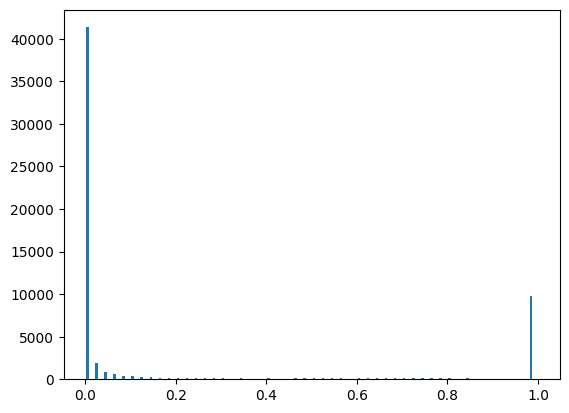

In [126]:
# plt.hist(integrated_hist_data[3], bins=50)
plt.hist(hiphase_hist_data[3], bins=50)

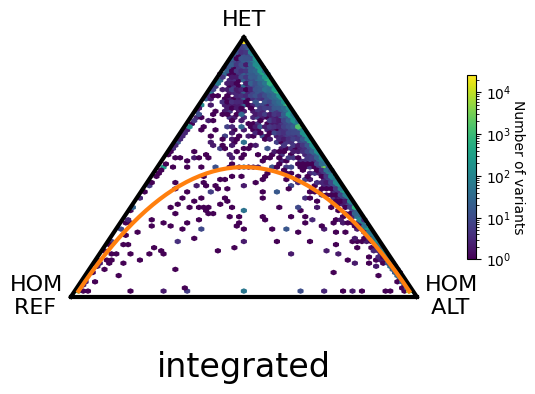

In [127]:
_ = plot_de_finetti(make_de_finetti_ax(), integrated_hist_data[2], title='integrated', show=True)

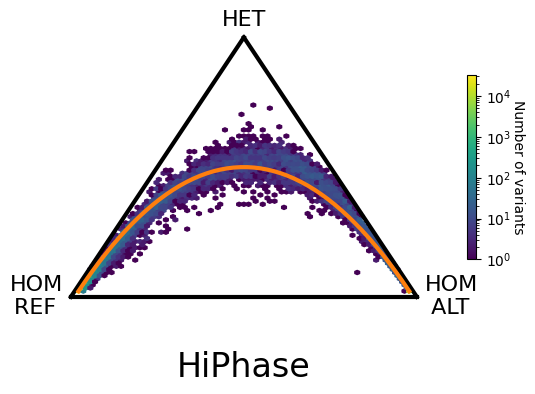

In [96]:
_ = plot_de_finetti(make_de_finetti_ax(), hiphase_hist_data[2], title='HiPhase', show=True)

In [82]:
! bcftools stats -r chr1 {integrated_sv_vcf_gz} | grep SN

# SN, Summary numbers:
#   number of SNPs      .. number of rows with a SNP
#   number of multiallelic SNP sites .. number of rows with multiple alternate alleles, all SNPs
#   counter. For example, a row with a SNP and an indel increments both the SNP and
# SN	[2]id	[3]key	[4]value
SN	0	number of samples:	1074
SN	0	number of records:	60271
SN	0	number of no-ALTs:	0
SN	0	number of SNPs:	0
SN	0	number of MNPs:	40
SN	0	number of indels:	59937
SN	0	number of others:	294
SN	0	number of multiallelic sites:	0
SN	0	number of multiallelic SNP sites:	0
# SiS	[2]id	[3]allele count	[4]number of SNPs	[5]number of transitions	[6]number of transversions	[7]number of indels	[8]repeat-consistent	[9]repeat-inconsistent	[10]not applicable
# AF	[2]id	[3]allele frequency	[4]number of SNPs	[5]number of transitions	[6]number of transversions	[7]number of indels	[8]repeat-consistent	[9]repeat-inconsistent	[10]not applicable
# QUAL	[2]id	[3]Quality	[4]number of SNPs	[5]number of transitions (1st ALT)	[6]numbe

In [80]:
! bcftools stats {hiphase_sv_vcf_gz} | grep SN

# SN, Summary numbers:
#   number of SNPs      .. number of rows with a SNP
#   number of multiallelic SNP sites .. number of rows with multiple alternate alleles, all SNPs
#   counter. For example, a row with a SNP and an indel increments both the SNP and
# SN	[2]id	[3]key	[4]value
SN	0	number of samples:	1074
SN	0	number of records:	60231
SN	0	number of no-ALTs:	0
SN	0	number of SNPs:	0
SN	0	number of MNPs:	0
SN	0	number of indels:	59937
SN	0	number of others:	294
SN	0	number of multiallelic sites:	0
SN	0	number of multiallelic SNP sites:	0
# SiS	[2]id	[3]allele count	[4]number of SNPs	[5]number of transitions	[6]number of transversions	[7]number of indels	[8]repeat-consistent	[9]repeat-inconsistent	[10]not applicable
# AF	[2]id	[3]allele frequency	[4]number of SNPs	[5]number of transitions	[6]number of transversions	[7]number of indels	[8]repeat-consistent	[9]repeat-inconsistent	[10]not applicable
# QUAL	[2]id	[3]Quality	[4]number of SNPs	[5]number of transitions (1st ALT)	[6]number